Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Epoch 1/10


c:\Users\skshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.6997 - loss: 1.1075 - val_accuracy: 0.9073 - val_loss: 0.3330
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9058 - loss: 0.3283 - val_accuracy: 0.9241 - val_loss: 0.2684
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9216 - loss: 0.2687 - val_accuracy: 0.9331 - val_loss: 0.2288
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9323 - loss: 0.2308 - val_accuracy: 0.9413 - val_loss: 0.2015
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9414 - loss: 0.2026 - val_accuracy: 0.9459 - val_loss: 0.1838
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9474 - loss: 0.1796 - val_accuracy: 0.9509 - val_loss: 0.1663
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9530 - loss: 0.1618 - val_accuracy: 0.9559 - val_loss: 0.1512
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9578 - loss: 0.1460 - va

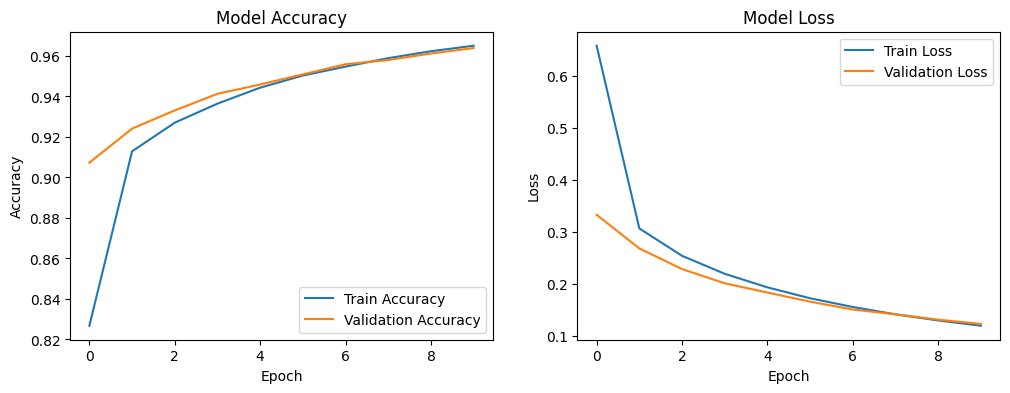

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


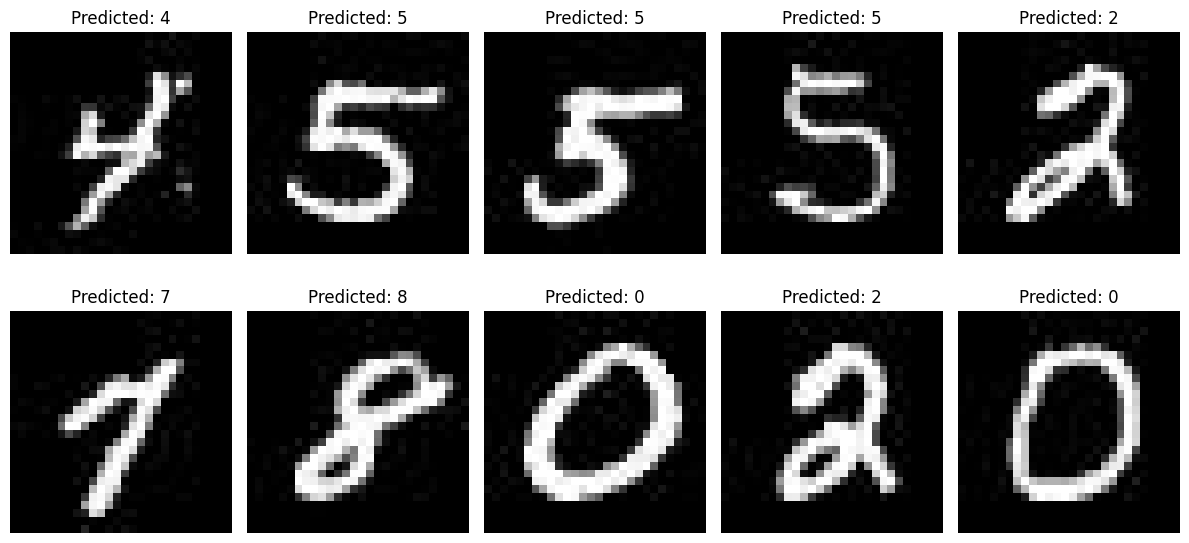

In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# b. Load the training and testing data from directory
# Define the paths to the train and test folders
train_dir = 'mnist-jpg/train'
test_dir = 'mnist-jpg/test'

# Use image_dataset_from_directory to load images from the directories
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(28, 28),
    color_mode='grayscale',  # MNIST images are grayscale
    batch_size=32,
    label_mode='int'  # Use integer labels
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'
)

# Normalize the data
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 images
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # For 10 classes (0-9)
])

# Compile the model using SGD optimizer and sparse categorical crossentropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# d. Train the model
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

# e. Evaluate the network
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

# f. Plot the training and validation accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training loss and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test dataset and display the first 10 images with predicted labels
plt.figure(figsize=(12,6))
for images, labels in test_ds.take(1):  # Take a single batch from test dataset
    predictions = model.predict(images)
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')  # Squeeze to remove channel dimension
        plt.title(f"Predicted: {np.argmax(predictions[i])}")
        plt.axis('off')
plt.tight_layout()
plt.show()
